In [10]:
%pylab inline
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


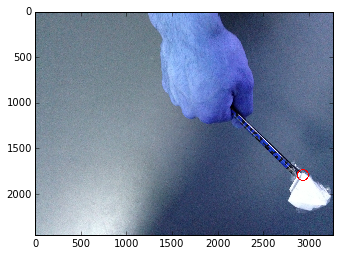

In [95]:
i = 4
img_filename = "images/table_pencil_white/table_pencil_white_%s.jpg" % i
image = cv2.imread(img_filename)
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
cv2.circle(image, maxLoc, 60, (255, 0, 0), 10)

plt.imshow(image)

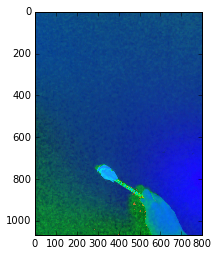

In [81]:
# load and convert image to HSV
i = 0
img_filename = "images/table_pencil/table_pencil_%s.jpg" % i
image = cv2.imread(img_filename)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

ORANGE_MIN = np.array([30.0, 127.5, 252.45],np.uint8)
ORANGE_MAX = np.array([10.0, 255.0, 255.0],np.uint8)

image_threshed = cv2.inRange(image_hsv, ORANGE_MIN, ORANGE_MAX)
plt.imshow(image_hsv)

In [72]:
def convert(h,s,v):
    print (h*180/float(360),s*255/float(100),v*255/float(100))
convert(190,96,96)

(95.0, 244.8, 244.8)


(1554, 1213)